#Multimodal LLM - GPT-4V
###Made by: Wilfredo Aaron Sosa Ramos

Reference: https://docs.llamaindex.ai/en/stable/examples/multi_modal/openai_multi_modal/

##1. URLs

In [ ]:
!pip install llama-index-llms-openai matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.5
    Uninstalling openai-1.54.5:
      Successfully uninstalled openai-1.54.5


In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
from llama_index.llms.openai import OpenAI

image_urls = [
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://i2-prod.mirror.co.uk/incoming/article7160664.ece/ALTERNATES/s1200d/FIFA-Ballon-dOr-Gala-2015.jpg",
]

openai_llm = OpenAI(model="gpt-4o", max_new_tokens=300)

https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg


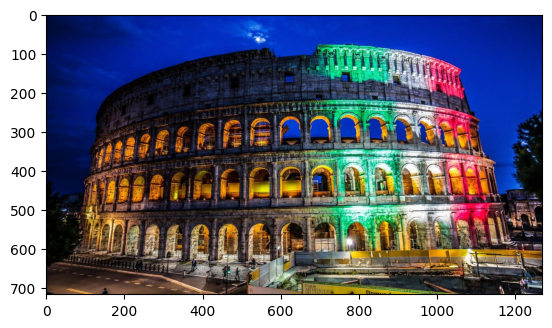

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg


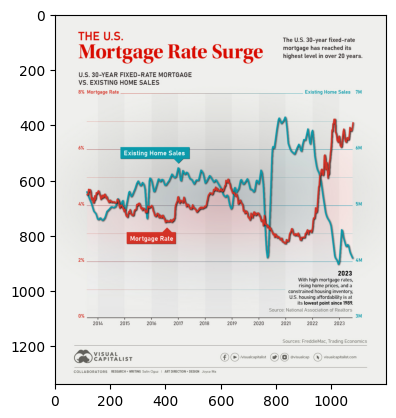

In [ ]:
img_response = requests.get(image_urls[1])
print(image_urls[1])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
from llama_index.core.llms import (
    ChatMessage,
    ImageBlock,
    TextBlock,
    MessageRole,
)

msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the images as an alternative text"),
        ImageBlock(url=image_urls[0]),
        ImageBlock(url=image_urls[1]),
    ],
)

response = openai_llm.chat(messages=[msg])

In [ ]:
print(response)

assistant: **Image 1:** The Colosseum in Rome is illuminated at night with the colors of the Italian flag: green, white, and red. The ancient structure stands against a deep blue sky, with some clouds visible. The foreground shows a construction area with barriers and a few people walking nearby.

**Image 2:** A line graph titled "The U.S. Mortgage Rate Surge" compares the U.S. 30-year fixed-rate mortgage (in red) with existing home sales (in blue) from 2014 to 2023. The mortgage rate line shows a significant increase, reaching its highest level in over 20 years. Existing home sales fluctuate, peaking around 2020 and declining thereafter. A note highlights that in 2023, high mortgage rates and rising home prices have led to the lowest housing affordability since 1989.


https://i2-prod.mirror.co.uk/incoming/article7160664.ece/ALTERNATES/s1200d/FIFA-Ballon-dOr-Gala-2015.jpg


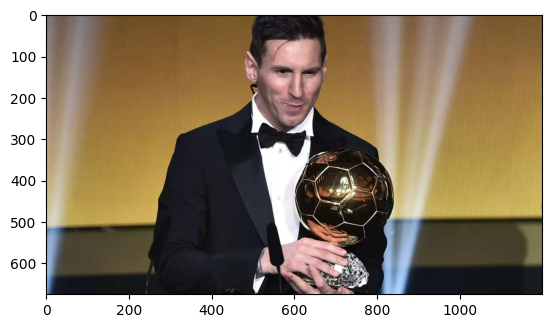

In [ ]:
img_response = requests.get(image_urls[2])
print(image_urls[2])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the images as an alternative text in Spanish"),
        ImageBlock(url=image_urls[2]),
    ],
)

response2 = openai_llm.chat(messages=[msg])

In [ ]:
print(response2)

assistant: Un hombre con traje negro y pajarita sostiene un trofeo dorado en forma de balón. Está en un escenario con un fondo dorado y luces brillantes.


In [ ]:
async_resp = await openai_llm.astream_chat(messages=[msg])
async for delta in async_resp:
    print(delta.delta, end="")

Un hombre con esmoquin negro y pajarita sostiene un trofeo dorado en forma de balón. Está en un escenario con un fondo dorado iluminado por luces brillantes.

##2. Local images:

In [ ]:
!pip install llama-index-readers-file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.3 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import shutil

import requests

img_path = Path().resolve() / "image.jpg"
#response = requests.get(image_urls[-1])
#with open(img_path, "wb") as file:
#    file.write(response.content)

msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the image as an alternative text"),
        ImageBlock(path=img_path, image_mimetype="image/jpeg"),
    ],
)

openai_llm = OpenAI(model="gpt-4o", max_new_tokens=300)

response = openai_llm.chat(messages=[msg])

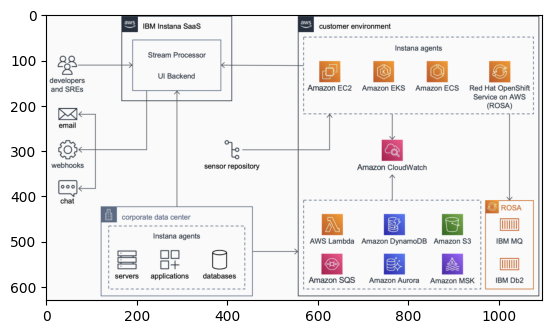

In [ ]:
img = Image.open(img_path)
plt.imshow(img)

In [ ]:
print(response)

assistant: The image is a diagram illustrating the architecture of IBM Instana SaaS integrated with a customer environment. On the left, there is a section labeled "IBM Instana SaaS" containing "Stream Processor" and "UI Backend," connected to a "sensor repository." Below, a "corporate data center" includes "servers," "applications," and "databases," with "Instana agents" monitoring them. Communication channels like "developers and SREs," "email," "webhooks," and "chat" are shown interacting with the IBM Instana SaaS.

On the right, the "customer environment" is depicted, featuring "Instana agents" monitoring various AWS services: "Amazon EC2," "Amazon EKS," "Amazon ECS," and "Red Hat OpenShift Service on AWS (ROSA)." These services are connected to "Amazon CloudWatch." Additional AWS services like "AWS Lambda," "Amazon DynamoDB," "Amazon S3," "Amazon SQS," "Amazon Aurora," and "Amazon MSK" are also integrated. The diagram is divided into sections with dotted lines, indicating differen